<a href="https://colab.research.google.com/github/SaraPao89/CNN-Cats-and-Dogs/blob/main/Copia_di_CNN_Cats%26Dogs_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LOAD DATASET AND PACKAGES

In [1]:
from google.colab import drive
import os


# move working directory to google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#unzip quitely file from drive
!unzip -q /content/gdrive/MyDrive/Sara\ Paolini/CatsDogs.zip


In [3]:
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import os 
import numpy as np
import os
import PIL
from PIL import Image
import pandas as pd 
from random import shuffle
import seaborn as sns
from tensorflow import keras 
from tensorflow.keras import layers 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.layers import RandomFlip, RandomRotation
from sklearn.model_selection import KFold

In [4]:
print(tf.__version__)

2.12.0


#DELETE DAMAGES  IMAGE AND CREATE DATAFRAME

In [5]:
#deleted damaged image
num_skipped = 0
for folder_name in ("Cats", "Dogs"):
    folder_path = os.path.join('CatsDogs', folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()
        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)
print("Deleted %d images" % num_skipped)


Deleted 1590 images


In [6]:
from os import walk

# folder path
source = 'CatsDogs'

# list to store files name
x = [] #files name
y = [] #directory name

#loop that walks through the directory
for root, dirnames, filenames in os.walk(source):
  #print(root)
  for filename in filenames:
    if filename.endswith(('.jpg')):
      my_str = root
      #x.append(os.path.join(my_str.split("/")[-1],filename))    
      x.append(os.path.join(my_str,filename))    
      y.append(my_str.rsplit('/', 1)[-1])

print(x)
print(y)


['CatsDogs/Dogs/8013.jpg', 'CatsDogs/Dogs/9330.jpg', 'CatsDogs/Dogs/10189.jpg', 'CatsDogs/Dogs/11377.jpg', 'CatsDogs/Dogs/8801.jpg', 'CatsDogs/Dogs/5648.jpg', 'CatsDogs/Dogs/1716.jpg', 'CatsDogs/Dogs/4940.jpg', 'CatsDogs/Dogs/2223.jpg', 'CatsDogs/Dogs/5999.jpg', 'CatsDogs/Dogs/2501.jpg', 'CatsDogs/Dogs/10759.jpg', 'CatsDogs/Dogs/7129.jpg', 'CatsDogs/Dogs/2891.jpg', 'CatsDogs/Dogs/9874.jpg', 'CatsDogs/Dogs/294.jpg', 'CatsDogs/Dogs/1398.jpg', 'CatsDogs/Dogs/1752.jpg', 'CatsDogs/Dogs/7015.jpg', 'CatsDogs/Dogs/12101.jpg', 'CatsDogs/Dogs/2181.jpg', 'CatsDogs/Dogs/8939.jpg', 'CatsDogs/Dogs/10618.jpg', 'CatsDogs/Dogs/3046.jpg', 'CatsDogs/Dogs/8173.jpg', 'CatsDogs/Dogs/5855.jpg', 'CatsDogs/Dogs/10649.jpg', 'CatsDogs/Dogs/7668.jpg', 'CatsDogs/Dogs/7708.jpg', 'CatsDogs/Dogs/708.jpg', 'CatsDogs/Dogs/8673.jpg', 'CatsDogs/Dogs/900.jpg', 'CatsDogs/Dogs/12010.jpg', 'CatsDogs/Dogs/10783.jpg', 'CatsDogs/Dogs/4512.jpg', 'CatsDogs/Dogs/11184.jpg', 'CatsDogs/Dogs/3587.jpg', 'CatsDogs/Dogs/2543.jpg', 'Cats

In [7]:
dictionary = {'File': x, 'Label': y}

In [8]:
dataframe = pd.DataFrame(dictionary)

In [9]:
dataframe.head()

,File,Label
0,CatsDogs/Dogs/8013.jpg,Dogs
1,CatsDogs/Dogs/9330.jpg,Dogs
2,CatsDogs/Dogs/10189.jpg,Dogs
3,CatsDogs/Dogs/11377.jpg,Dogs
4,CatsDogs/Dogs/8801.jpg,Dogs


In [10]:
dataframe = dataframe.sample(frac=1).reset_index(drop=True)

In [11]:
dataframe.tail(10)

,File,Label
23400,CatsDogs/Cats/4069.jpg,Cats
23401,CatsDogs/Dogs/2341.jpg,Dogs
23402,CatsDogs/Cats/4838.jpg,Cats
23403,CatsDogs/Dogs/10578.jpg,Dogs
23404,CatsDogs/Cats/2119.jpg,Cats
23405,CatsDogs/Dogs/12431.jpg,Dogs
23406,CatsDogs/Dogs/6715.jpg,Dogs
23407,CatsDogs/Cats/6127.jpg,Cats
23408,CatsDogs/Cats/7482.jpg,Cats
23409,CatsDogs/Dogs/12024.jpg,Dogs



#TRAINING AND TEST SPLIT

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

In [13]:
from matplotlib.colors import XKCD_COLORS

In [14]:
# Split the dataframe into train and temp subsets
train_val_df, test_df = train_test_split(dataframe, test_size=0.2)

# Print the number of rows in each dataframe
print("Number of rows in train + val dataframe:", len(train_val_df))
print("Number of rows in test dataframe:", len(test_df))

Number of rows in train + val dataframe: 18728
Number of rows in test dataframe: 4682


In [15]:
train_val_df.head(10)

,File,Label
8587,CatsDogs/Cats/2066.jpg,Cats
21388,CatsDogs/Dogs/7191.jpg,Dogs
10658,CatsDogs/Cats/1010.jpg,Cats
4186,CatsDogs/Cats/1594.jpg,Cats
16529,CatsDogs/Cats/9411.jpg,Cats
8888,CatsDogs/Cats/719.jpg,Cats
3581,CatsDogs/Cats/1463.jpg,Cats
1579,CatsDogs/Cats/183.jpg,Cats
12640,CatsDogs/Dogs/3325.jpg,Dogs
10160,CatsDogs/Dogs/1435.jpg,Dogs


In [16]:
train_ds = datagen.flow_from_dataframe(
    dataframe = train_val_df,
    directory = ".",
    target_size = (128, 128), 
    class_mode = "binary",
    x_col = "File", 
    y_col = "Label",
    seed = 1234,  
    batch_size = 32,
    subset = "training"
)

Found 14983 validated image filenames belonging to 2 classes.


In [17]:
validation_ds = datagen.flow_from_dataframe(
    dataframe = train_val_df,
    directory = ".",
    target_size = (128, 128), 
    class_mode = "binary",
    x_col = "File", 
    y_col = "Label",
    seed = 1234,  
    batch_size = 32,
    subset = "validation"
)

Found 3745 validated image filenames belonging to 2 classes.


In [18]:
test_ds = datagen.flow_from_dataframe(
    dataframe = test_df,
    directory = ".",
    target_size = (128, 128), 
    class_mode = "binary",
    x_col = "File", 
    y_col = "Label", 
    seed = 1234,  
    shuffle = False  
)

Found 4682 validated image filenames belonging to 2 classes.


In [19]:
test_df

,File,Label
6436,CatsDogs/Cats/6695.jpg,Cats
9064,CatsDogs/Cats/5278.jpg,Cats
15949,CatsDogs/Dogs/8013.jpg,Dogs
2177,CatsDogs/Dogs/9863.jpg,Dogs
6473,CatsDogs/Cats/10881.jpg,Cats
...,...,...
9868,CatsDogs/Cats/11520.jpg,Cats
13023,CatsDogs/Dogs/2854.jpg,Dogs
7268,CatsDogs/Dogs/12234.jpg,Dogs
10572,CatsDogs/Dogs/1093.jpg,Dogs


#Plotting images

In [ ]:
CATEGORIES = ['Cats', 'Dogs']

In [ ]:
def display_images(train_ds,image_size=(224, 224)):
    # Get the first 9 images and labels from the DataFrame
    images = train_ds['File'].values[:9]
    labels = train_ds['Label'].values[:9]

    # Load and resize the images
    images = [np.array(Image.open(img).resize(image_size)) for img in images]

    # Plot the images
    plt.figure(figsize=(8, 8))
    for i in range(len(images)):
        plt.subplot(3, 3, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()
    

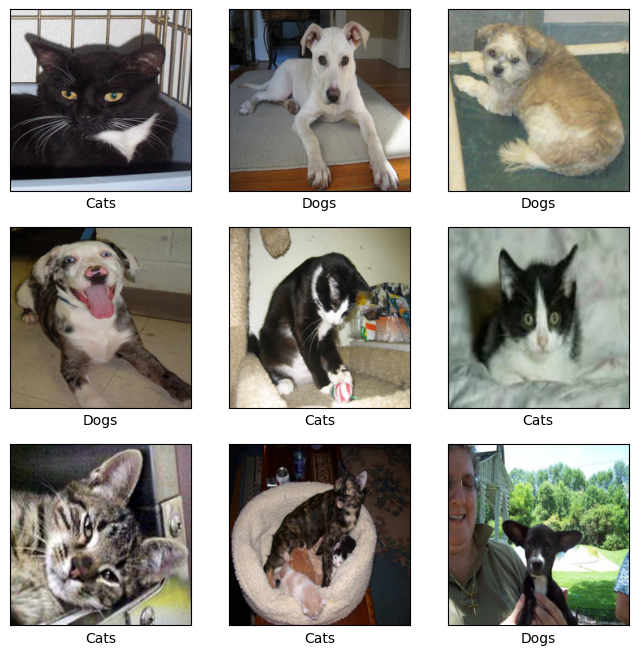

In [ ]:
display_images(train_val_df)

#Early stop 

In [20]:
early_stop = tf.keras.callbacks.EarlyStopping(
      monitor='val_loss',
      patience=5,
      mode='min',
      restore_best_weights=True,
      start_from_epoch=20
  )

#MODEL 1


In [ ]:
#INITIALIZED THE MODEL 
model_0 = Sequential()


#Convolutional block 1
model_0.add(Conv2D(filters=32, kernel_size=(3,3),  padding="same", input_shape = (128,128,3)))
model_0.add(Activation(activation="relu"))
model_0.add(MaxPooling2D(pool_size=(2,2)))


#Fully Connected Layer
model_0.add(Flatten())
model_0.add(Dense(64))
model_0.add(Activation ("relu"))

#Output layer
model_0.add(Dense(1)) 
model_0.add(Activation ("sigmoid"))


model_0.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
    
model_0.summary()  

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 activation_20 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 131072)            0         
                                                                 
 dense_8 (Dense)             (None, 64)                8388672   
                                                                 
 activation_21 (Activation)  (None, 64)                0         
                                                      

In [ ]:
history = model_0.fit(train_ds, epochs=30, validation_data = validation_ds, callbacks=early_stop)

Epoch 1/30
104/469 [=====>........................] - ETA: 2:29 - loss: 1.3399 - accuracy: 0.4973

KeyboardInterrupt: ignored

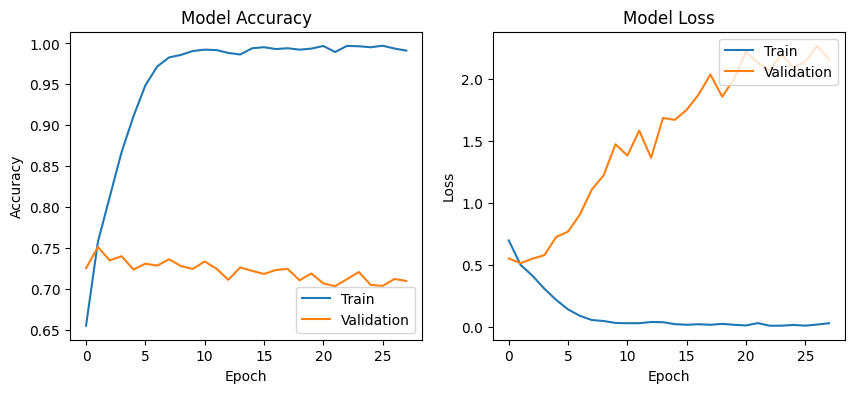

In [ ]:
plt.figure (figsize = (10,4))
plt.subplot(1,2,1)

plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend (['Train', 'Validation'], loc = 'lower right')

plt.subplot (1,2,2)
plt.plot (history.history ['loss'])
plt.plot (history.history ['val_loss'])
plt.title ('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend (['Train', 'Validation'], loc = 'upper right')
plt.show()
plt.show()


In [ ]:
model_0.save_weights ("/content/gdrive/MyDrive/model_0.h5") 

In [ ]:
model_0.load_weights("/content/gdrive/MyDrive/model_0.h5")

In [ ]:
model_0.evaluate(test_ds)

147/147 [==============================] - 24s 165ms/step - loss: 0.4625 - accuracy: 0.7836


[0.46245765686035156, 0.7836394906044006]

#Model 2

adding drop out

In [22]:
#INITIALIZED THE MODEL 
model_0_1 = Sequential()


#Convolutional block 1
model_0_1.add(Conv2D(filters=32, kernel_size=(3,3),  padding="same", input_shape = (128,128,3)))
model_0_1.add(Activation(activation="relu"))
model_0_1.add(MaxPooling2D(pool_size=(2,2)))
model_0_1.add(Dropout(0.1))


#Fully Connected Layer
model_0_1.add(Flatten())
model_0_1.add(Dense(64))
model_0_1.add(Activation ("relu"))
model_0_1.add(Dropout(0.2))

#Output layer
model_0_1.add(Dense(1)) 
model_0_1.add(Activation ("sigmoid"))


model_0_1.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
    
model_0_1.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 activation (Activation)     (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 64)                8388672   
                                                        

In [24]:
history = model_0_1.fit(train_ds, epochs=30, validation_data = validation_ds, callbacks=early_stop)

Epoch 1/30
469/469 [==============================] - 75s 135ms/step - loss: 0.7437 - accuracy: 0.4964 - val_loss: 0.6931 - val_accuracy: 0.4943
Epoch 2/30
469/469 [==============================] - 61s 129ms/step - loss: 0.6921 - accuracy: 0.5023 - val_loss: 0.6871 - val_accuracy: 0.4927
Epoch 3/30
469/469 [==============================] - 61s 130ms/step - loss: 0.6668 - accuracy: 0.6003 - val_loss: 0.6319 - val_accuracy: 0.6833
Epoch 4/30
469/469 [==============================] - 61s 131ms/step - loss: 0.6258 - accuracy: 0.6636 - val_loss: 0.5970 - val_accuracy: 0.7167
Epoch 5/30
469/469 [==============================] - 61s 131ms/step - loss: 0.5816 - accuracy: 0.6947 - val_loss: 0.5608 - val_accuracy: 0.7207
Epoch 6/30
469/469 [==============================] - 61s 130ms/step - loss: 0.5288 - accuracy: 0.7224 - val_loss: 0.5225 - val_accuracy: 0.7429
Epoch 7/30
469/469 [==============================] - 60s 128ms/step - loss: 0.4742 - accuracy: 0.7475 - val_loss: 0.5350 - val_ac

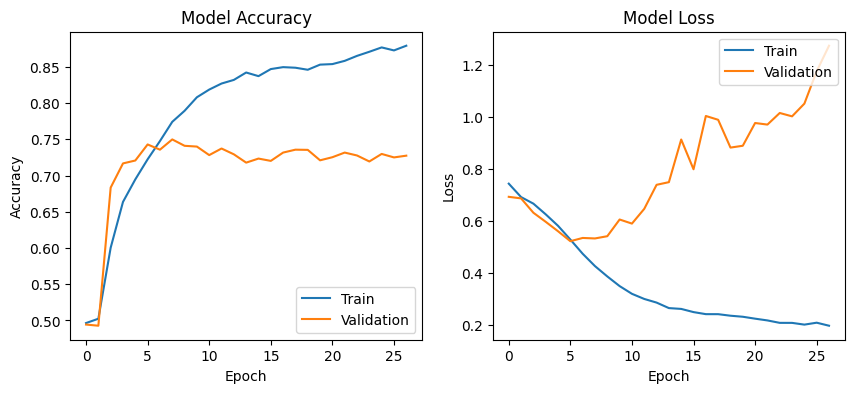

In [25]:
plt.figure (figsize = (10,4))
plt.subplot(1,2,1)

plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend (['Train', 'Validation'], loc = 'lower right')

plt.subplot (1,2,2)
plt.plot (history.history ['loss'])
plt.plot (history.history ['val_loss'])
plt.title ('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend (['Train', 'Validation'], loc = 'upper right')
plt.show()
plt.show()

In [28]:
model_0_1.save_weights ("/content/gdrive/MyDrive/model_0.h5") 

In [29]:
model_0_1.load_weights("/content/gdrive/MyDrive/model_0.h5")

In [30]:
model_0_1.evaluate(test_ds)

147/147 [==============================] - 16s 108ms/step - loss: 0.9823 - accuracy: 0.7411


[0.9822589755058289, 0.7411362528800964]

#MODEL 3

adding augmentation



In [33]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomTranslation, RandomZoom, RandomBrightness, RandomContrast

In [31]:
#INITIALIZED THE MODEL 
model_0_5 = Sequential()

#Augmetatiom
model_0_5.add(RandomFlip("horizontal", input_shape = (128,128,3)))
model_0_5.add(RandomRotation(0.2))

#Convolutional block 1
model_0_5.add(Conv2D(filters=32, kernel_size=(3,3),  padding="same"))
model_0_5.add(Activation(activation="relu"))
model_0_5.add(MaxPooling2D(pool_size=(2,2)))


#Fully Connected Layer
model_0_5.add(Flatten())
model_0_5.add(Dense(64))
model_0_5.add(Activation ("relu"))

#Output layer
model_0_5.add(Dense(1)) 
model_0_5.add(Activation ("sigmoid"))


model_0_5.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
    
model_0_5.summary()  

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 128, 128, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 128, 128, 3)      0         
 tion)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 activation_3 (Activation)   (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 131072)           

In [35]:
history = model_0_5.fit(train_ds, epochs=30, validation_data = validation_ds, callbacks=early_stop)

Epoch 1/30
469/469 [==============================] - 73s 152ms/step - loss: 0.8025 - accuracy: 0.6113 - val_loss: 0.6804 - val_accuracy: 0.6203
Epoch 2/30
469/469 [==============================] - 71s 152ms/step - loss: 0.6119 - accuracy: 0.6666 - val_loss: 0.5770 - val_accuracy: 0.6999
Epoch 3/30
469/469 [==============================] - 62s 133ms/step - loss: 0.5890 - accuracy: 0.6866 - val_loss: 0.5747 - val_accuracy: 0.6961
Epoch 4/30
469/469 [==============================] - 62s 132ms/step - loss: 0.5805 - accuracy: 0.6885 - val_loss: 0.5662 - val_accuracy: 0.7076
Epoch 5/30
469/469 [==============================] - 60s 129ms/step - loss: 0.5722 - accuracy: 0.7012 - val_loss: 0.5722 - val_accuracy: 0.7033
Epoch 6/30
469/469 [==============================] - 60s 129ms/step - loss: 0.5639 - accuracy: 0.7069 - val_loss: 0.5436 - val_accuracy: 0.7207
Epoch 7/30
469/469 [==============================] - 62s 132ms/step - loss: 0.5539 - accuracy: 0.7149 - val_loss: 0.5300 - val_ac

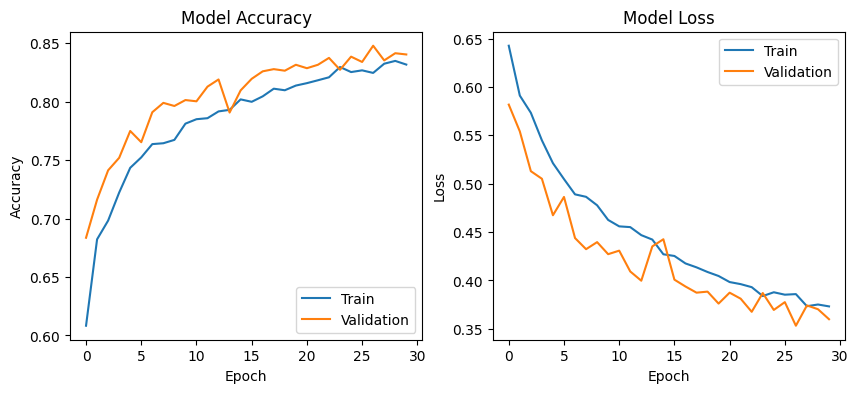

In [49]:
plt.figure (figsize = (10,4))
plt.subplot(1,2,1)

plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend (['Train', 'Validation'], loc = 'lower right')

plt.subplot (1,2,2)
plt.plot (history.history ['loss'])
plt.plot (history.history ['val_loss'])
plt.title ('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend (['Train', 'Validation'], loc = 'upper right')
plt.show()
plt.show()

In [44]:
model_0_5.save_weights ("/content/gdrive/MyDrive/model_0_5.h5") 

In [38]:
model_0_5.load_weights("/content/gdrive/MyDrive/model_0_5.h5")

In [39]:
model_0_5.evaluate(test_ds)

147/147 [==============================] - 25s 173ms/step - loss: 0.4966 - accuracy: 0.7653


[0.49661019444465637, 0.7652712464332581]

#MODEL 4
Adding 2 convolutional block (tot=3)

In [54]:
#INITIALIZED THE MODEL 
model_1 = Sequential()

#Augmetatiom
model_1.add(RandomFlip("horizontal", input_shape = (128,128,3)))
model_1.add(RandomRotation(0.2))


#Convolutional block 1
model_1.add(Conv2D(filters=32, kernel_size=(3,3),  padding="same"))
model_1.add(Activation(activation="relu"))
model_1.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional block 2
model_1.add(Conv2D(filters=32, kernel_size=(3,3), padding="same"))
model_1.add(Activation(activation="relu")) 
model_1.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional block 3
model_1.add(Conv2D(filters=32, kernel_size=(3,3), padding="same"))
model_1.add(Activation(activation="relu"))
model_1.add(MaxPooling2D(pool_size=(2,2)))

#Fully Connected Layer
model_1.add(Flatten())
model_1.add(Dense(64))
model_1.add(Activation ("relu"))

#Output layer
model_1.add(Dense(1))
model_1.add(Activation ("sigmoid"))


model_1.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
    
model_1.summary()  

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_5 (RandomFlip)  (None, 128, 128, 3)       0         
                                                                 
 random_rotation_5 (RandomRo  (None, 128, 128, 3)      0         
 tation)                                                         
                                                                 
 conv2d_16 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 activation_28 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 32)       

In [ ]:
history = model_1.fit(train_ds, epochs=30, validation_data = validation_ds, callbacks=early_stop)

Epoch 1/30
469/469 [==============================] - 104s 193ms/step - loss: 0.6532 - accuracy: 0.6125 - val_loss: 0.5655 - val_accuracy: 0.7072
Epoch 2/30
469/469 [==============================] - 83s 176ms/step - loss: 0.5810 - accuracy: 0.6883 - val_loss: 0.5325 - val_accuracy: 0.7312
Epoch 3/30
469/469 [==============================] - 83s 176ms/step - loss: 0.5342 - accuracy: 0.7292 - val_loss: 0.4896 - val_accuracy: 0.7648
Epoch 4/30
469/469 [==============================] - 87s 186ms/step - loss: 0.5143 - accuracy: 0.7442 - val_loss: 0.4665 - val_accuracy: 0.7781
Epoch 5/30
469/469 [==============================] - 81s 173ms/step - loss: 0.4932 - accuracy: 0.7593 - val_loss: 0.4633 - val_accuracy: 0.7816
Epoch 6/30
469/469 [==============================] - 81s 173ms/step - loss: 0.4787 - accuracy: 0.7705 - val_loss: 0.4467 - val_accuracy: 0.7923
Epoch 7/30
469/469 [==============================] - 82s 175ms/step - loss: 0.4661 - accuracy: 0.7823 - val_loss: 0.5284 - val_a

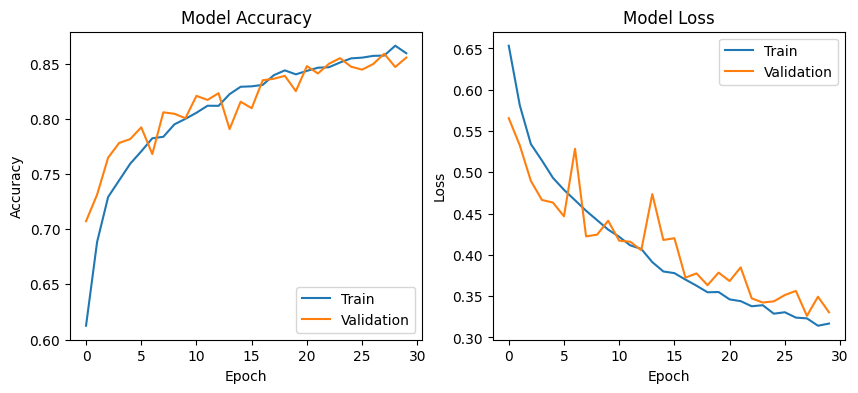

In [ ]:
plt.figure (figsize = (10,4))
plt.subplot(1,2,1)

plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend (['Train', 'Validation'], loc = 'lower right')

plt.subplot (1,2,2)
plt.plot (history.history ['loss'])
plt.plot (history.history ['val_loss'])
plt.title ('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend (['Train', 'Validation'], loc = 'upper right')
plt.show()
plt.show()
#parameter are different from hyperparameter

In [ ]:
model_1.save_weights ("/content/gdrive/MyDrive/model_1.h5") #h5= estensione del file tipo.jpg

In [ ]:
model_1.load_weights("/content/gdrive/MyDrive/model_1.h5")

In [ ]:
model_1.evaluate(test_ds)

147/147 [==============================] - 16s 109ms/step - loss: 0.2883 - accuracy: 0.8721


[0.28830060362815857, 0.8720632195472717]

#MODEL 5


Adding 2 convolutional layers (tot =5)

In [53]:
#INITIALIZED THE MODEL 
model_3 = Sequential()

#Augmetatiom
model_3.add(RandomFlip("horizontal", input_shape = (128,128,3)))
model_3.add(RandomRotation(0.1))


#Convolutional block 1
model_3.add(Conv2D(filters=32, kernel_size=(3,3),  padding="same"))
model_3.add(Activation(activation="relu"))
model_3.add(MaxPooling2D(pool_size=(2,2)))


#Convolutional block 2
model_3.add(Conv2D(filters=32, kernel_size=(3,3), padding="same"))
model_3.add(Activation(activation="relu")) 
model_3.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional block 3
model_3.add(Conv2D(filters=32, kernel_size=(3,3), padding="same"))
model_3.add(Activation(activation="relu"))
model_3.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional block 4
model_3.add(Conv2D(filters=32, kernel_size=(3,3), padding="same"))
model_3.add(Activation(activation="relu")) 
model_3.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional block 5
model_3.add(Conv2D(filters=32, kernel_size=(3,3), padding="same"))
model_3.add(Activation(activation="relu"))
model_3.add(MaxPooling2D(pool_size=(2,2)))

#Fully Connected Layer
model_3.add(Flatten())
model_3.add(Dense(64))
model_3.add(Activation ("relu"))

#Output layer
model_3.add(Dense(1)) 
model_3.add(Activation ("sigmoid"))

model_3.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
    
model_3.summary()  

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_4 (RandomFlip)  (None, 128, 128, 3)       0         
                                                                 
 random_rotation_4 (RandomRo  (None, 128, 128, 3)      0         
 tation)                                                         
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 activation_21 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 32)       

In [ ]:
history = model_3.fit(train_ds, epochs=30, validation_data = validation_ds, callbacks=early_stop)

Epoch 1/30
469/469 [==============================] - 489s 1s/step - loss: 0.6705 - accuracy: 0.5792 - val_loss: 0.6207 - val_accuracy: 0.6732
Epoch 2/30
469/469 [==============================] - 486s 1s/step - loss: 0.5846 - accuracy: 0.6963 - val_loss: 0.5358 - val_accuracy: 0.7220
Epoch 3/30
469/469 [==============================] - 483s 1s/step - loss: 0.5284 - accuracy: 0.7362 - val_loss: 0.4963 - val_accuracy: 0.7607
Epoch 4/30
469/469 [==============================] - 474s 1s/step - loss: 0.4842 - accuracy: 0.7656 - val_loss: 0.4410 - val_accuracy: 0.7941
Epoch 5/30
469/469 [==============================] - 486s 1s/step - loss: 0.4469 - accuracy: 0.7915 - val_loss: 0.4463 - val_accuracy: 0.7896
Epoch 6/30
469/469 [==============================] - 483s 1s/step - loss: 0.4179 - accuracy: 0.8060 - val_loss: 0.4391 - val_accuracy: 0.7933
Epoch 7/30
469/469 [==============================] - 483s 1s/step - loss: 0.3970 - accuracy: 0.8193 - val_loss: 0.3729 - val_accuracy: 0.8331

In [ ]:
model_3.summary() 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_9 (RandomFlip)  (None, 128, 128, 3)       0         
                                                                 
 random_rotation_5 (RandomRo  (None, 128, 128, 3)      0         
 tation)                                                         
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 activation_10 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 32)       

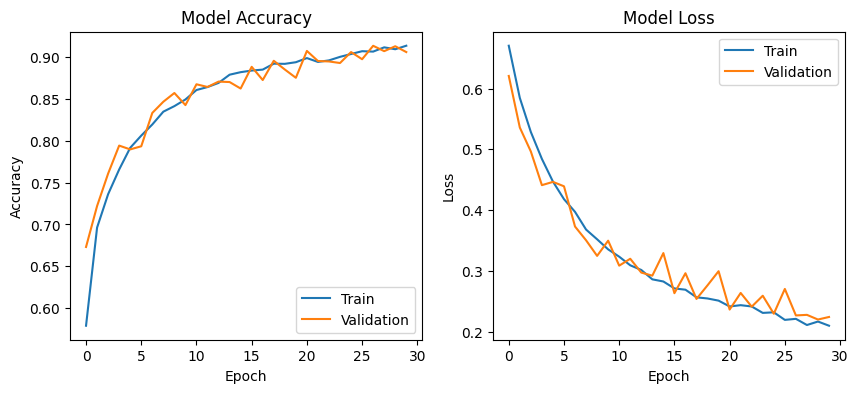

In [ ]:
plt.figure (figsize = (10,4))
plt.subplot(1,2,1)

plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend (['Train', 'Validation'], loc = 'lower right')

plt.subplot (1,2,2)
plt.plot (history.history ['loss'])
plt.plot (history.history ['val_loss'])
plt.title ('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend (['Train', 'Validation'], loc = 'upper right')
plt.show()
plt.show()
#parameter are different from hyperparameter

In [ ]:
model_3.save_weights ("/content/gdrive/MyDrive/model_3.h5")

In [68]:
model_3.load_weights ("/content/gdrive/MyDrive/Sara Paolini/model_3.h5") 

In [69]:
model_3.evaluate(test_ds)

147/147 [==============================] - 16s 108ms/step - loss: 0.1882 - accuracy: 0.9244


[0.1882207989692688, 0.9243912696838379]

#MODEL 6
Filter size 16

In [51]:
#INITIALIZED THE MODEL 
model_5 = Sequential()

#Augmetatiom
model_5.add(RandomFlip("horizontal", input_shape = (128,128,3)))
model_5.add(RandomRotation(0.2))

#Convolutional block 1
model_5.add(Conv2D(filters=16, kernel_size=(3,3),  padding="same"))
model_5.add(Activation(activation="relu"))
model_5.add(MaxPooling2D(pool_size=(2,2)))



#Convolutional block 2
model_5.add(Conv2D(filters=16, kernel_size=(3,3), padding="same"))
model_5.add(Activation(activation="relu")) 
model_5.add(MaxPooling2D(pool_size=(2,2)))


#Convolutional block 3
model_5.add(Conv2D(filters=16, kernel_size=(3,3), padding="same"))
model_5.add(Activation(activation="relu"))
model_5.add(MaxPooling2D(pool_size=(2,2)))


#Convolutional block 4
model_5.add(Conv2D(filters=32, kernel_size=(3,3), padding="same"))
model_5.add(Activation(activation="relu")) 
model_5.add(MaxPooling2D(pool_size=(2,2)))


#Convolutional block 5
model_5.add(Conv2D(filters=16, kernel_size=(3,3), padding="same"))
model_5.add(Activation(activation="relu"))
model_5.add(MaxPooling2D(pool_size=(2,2)))

#Fully Connected Layer
model_5.add(Flatten())
model_5.add(Dense(64))
model_5.add(Activation ("relu"))

#Output layer
model_5.add(Dense(1)) 
model_5.add(Activation ("sigmoid"))

model_5.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
    
model_5.summary()  

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_3 (RandomFlip)  (None, 128, 128, 3)       0         
                                                                 
 random_rotation_3 (RandomRo  (None, 128, 128, 3)      0         
 tation)                                                         
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 activation_14 (Activation)  (None, 128, 128, 16)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 16)       

In [ ]:
history = model_5.fit(train_ds, epochs=30, validation_data= validation_ds, callbacks=early_stop)

Epoch 1/30
469/469 [==============================] - 69s 140ms/step - loss: 0.6713 - accuracy: 0.5766 - val_loss: 0.6262 - val_accuracy: 0.6619
Epoch 2/30
469/469 [==============================] - 64s 137ms/step - loss: 0.6153 - accuracy: 0.6698 - val_loss: 0.5925 - val_accuracy: 0.6766
Epoch 3/30
469/469 [==============================] - 65s 139ms/step - loss: 0.5759 - accuracy: 0.7023 - val_loss: 0.5376 - val_accuracy: 0.7276
Epoch 4/30
469/469 [==============================] - 62s 133ms/step - loss: 0.5471 - accuracy: 0.7219 - val_loss: 0.5159 - val_accuracy: 0.7479
Epoch 5/30
469/469 [==============================] - 63s 134ms/step - loss: 0.5197 - accuracy: 0.7435 - val_loss: 0.5037 - val_accuracy: 0.7533
Epoch 6/30
469/469 [==============================] - 73s 156ms/step - loss: 0.5077 - accuracy: 0.7511 - val_loss: 0.5257 - val_accuracy: 0.7397
Epoch 7/30
469/469 [==============================] - 73s 156ms/step - loss: 0.4963 - accuracy: 0.7579 - val_loss: 0.4742 - val_ac

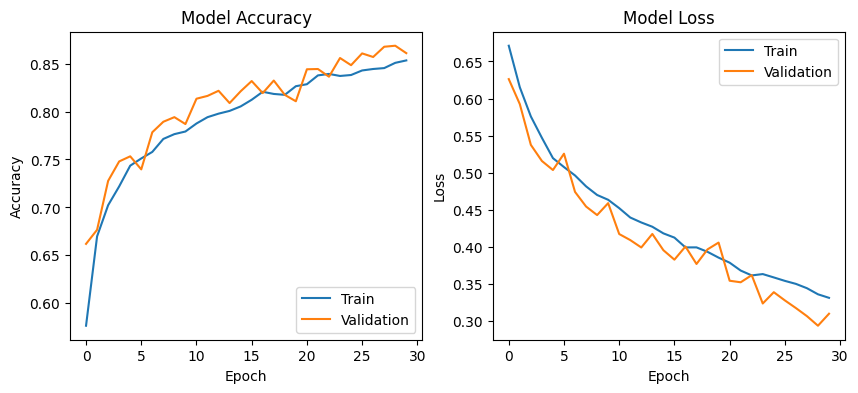

In [ ]:
plt.figure (figsize = (10,4))
plt.subplot(1,2,1)

plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend (['Train', 'Validation'], loc = 'lower right')

plt.subplot (1,2,2)
plt.plot (history.history ['loss'])
plt.plot (history.history ['val_loss'])
plt.title ('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend (['Train', 'Validation'], loc = 'upper right')
plt.show()
plt.show()


In [ ]:
model_5.save_weights ("/content/gdrive/MyDrive/model_5.h5") 

In [52]:
model_5.load_weights("/content/gdrive/MyDrive/model_5.h5")

FileNotFoundError: ignored

In [ ]:
model_5.evaluate(test_ds)

147/147 [==============================] - 16s 107ms/step - loss: 0.3112 - accuracy: 0.8654


[0.31115537881851196, 0.8654420971870422]

#MODEL 7
Filters size 64

In [ ]:
#INITIALIZED THE MODEL 
model_6 = Sequential()

#Augmetatiom
model_6.add(RandomFlip("horizontal", input_shape = (128,128,3)))
model_6.add(RandomRotation(0.2))

#Convolutional block 1
model_6.add(Conv2D(filters=64, kernel_size=(3,3),  padding="same"))
model_6.add(Activation(activation="relu"))
model_6.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional block 2
model_6.add(Conv2D(filters=64, kernel_size=(3,3), padding="same"))
model_6.add(Activation(activation="relu")) 
model_6.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional block 3
model_6.add(Conv2D(filters=64, kernel_size=(3,3), padding="same"))
model_6.add(Activation(activation="relu"))
model_6.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional block 4
model_6.add(Conv2D(filters=64, kernel_size=(3,3), padding="same"))
model_6.add(Activation(activation="relu")) 
model_6.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional block 5
model_6.add(Conv2D(filters=64, kernel_size=(3,3), padding="same"))
model_6.add(Activation(activation="relu"))
model_6.add(MaxPooling2D(pool_size=(2,2)))

#Fully Connected Layer
model_6.add(Flatten())
model_6.add(Dense(64))
model_6.add(Activation ("relu"))

#Output layer
model_6.add(Dense(1))
model_6.add(Activation ("sigmoid"))

model_6.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
    
model_6.summary()  

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 128, 128, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 128, 128, 3)      0         
 tation)                                                         
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 activation_8 (Activation)   (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 64)       

In [ ]:
history = model_6.fit(train_ds, epochs=30, validation_data= validation_ds, callbacks=early_stop)

Epoch 1/30
469/469 [==============================] - 67s 137ms/step - loss: 0.6764 - accuracy: 0.5671 - val_loss: 0.6536 - val_accuracy: 0.6155
Epoch 2/30
469/469 [==============================] - 63s 134ms/step - loss: 0.6207 - accuracy: 0.6589 - val_loss: 0.5719 - val_accuracy: 0.6996
Epoch 3/30
469/469 [==============================] - 64s 136ms/step - loss: 0.5672 - accuracy: 0.7043 - val_loss: 0.5270 - val_accuracy: 0.7335
Epoch 4/30
469/469 [==============================] - 73s 155ms/step - loss: 0.5284 - accuracy: 0.7342 - val_loss: 0.5405 - val_accuracy: 0.7191
Epoch 5/30
469/469 [==============================] - 64s 137ms/step - loss: 0.5011 - accuracy: 0.7545 - val_loss: 0.5040 - val_accuracy: 0.7589
Epoch 6/30
469/469 [==============================] - 73s 156ms/step - loss: 0.4726 - accuracy: 0.7717 - val_loss: 0.4572 - val_accuracy: 0.7810
Epoch 7/30
469/469 [==============================] - 65s 138ms/step - loss: 0.4454 - accuracy: 0.7897 - val_loss: 0.5109 - val_ac

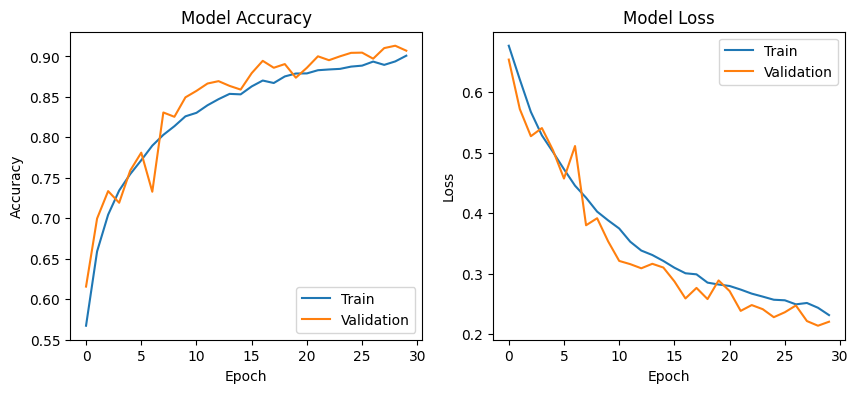

In [ ]:
plt.figure (figsize = (10,4))
plt.subplot(1,2,1)

plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend (['Train', 'Validation'], loc = 'lower right')

plt.subplot (1,2,2)
plt.plot (history.history ['loss'])
plt.plot (history.history ['val_loss'])
plt.title ('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend (['Train', 'Validation'], loc = 'upper right')
plt.show()
plt.show()


In [ ]:
model_6.save_weights ("/content/gdrive/MyDrive/model_6.h5") 

In [ ]:
model_6.evaluate(test_ds)

147/147 [==============================] - 15s 104ms/step - loss: 0.2323 - accuracy: 0.9007


[0.23230355978012085, 0.9006834626197815]

#PREDICTIONS

In [70]:
from sklearn.model_selection import KFold


In [71]:
y_true = test_df['Label']
print(y_true)

6436     Cats
9064     Cats
15949    Dogs
2177     Dogs
6473     Cats
         ... 
9868     Cats
13023    Dogs
7268     Dogs
10572    Dogs
1467     Cats
Name: Label, Length: 4682, dtype: object


In [72]:
#true prediction from string to number
target_test = []
for a in test_df['Label']:
  if a == 'Cats':
   target_test.append(0)
  else :
   target_test.append(1)
  
print (target_test)

[0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 

In [73]:
class_names = dataframe['Label'].unique().tolist()
print(class_names)

['Dogs', 'Cats']


In [74]:
#predicted probability
y_prediction= model_3.predict(test_ds) 
y_prediction 

147/147 [==============================] - 16s 111ms/step


array([[0.90474   ],
       [0.00307639],
       [0.11439321],
       ...,
       [0.9995974 ],
       [0.9842428 ],
       [0.08282825]], dtype=float32)

In [75]:
def predict_classes(x): 
  proba=x
  if proba.shape[-1] > 1:
      return proba.argmax(axis=-1)
  else:
      return (proba > 0.5).astype("int32")

In [76]:
#From probability to classes
classes = [] 
prediction_index = list(predict_classes(y_prediction))
for c_p in prediction_index:
  classes.append(c_p[0])


In [77]:
#import library for evaluation
from sklearn import metrics

In [78]:
model_eval_metrics = metrics.classification_report(target_test, classes, target_names = class_names)

In [79]:
print(model_eval_metrics)

              precision    recall  f1-score   support

        Dogs       0.92      0.93      0.92      2345
        Cats       0.93      0.92      0.92      2337

    accuracy                           0.92      4682
   macro avg       0.92      0.92      0.92      4682
weighted avg       0.92      0.92      0.92      4682



In [80]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [81]:
cm = confusion_matrix(target_test, classes)

# Stampa della confusion matrix
print(cm)

[[2181  164]
 [ 190 2147]]


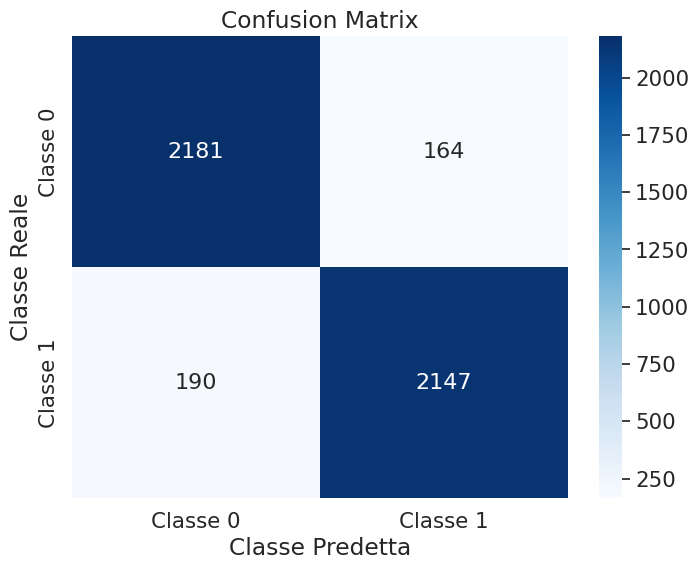

In [82]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4) 

# To create the plot
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 16})

# Label of axes
plt.xlabel("Classe Predetta")
plt.ylabel("Classe Reale")

class_names = ['Classe 0', 'Classe 1']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks + 0.5, class_names)
plt.yticks(tick_marks + 0.5, class_names)

# Title
plt.title("Confusion Matrix")

plt.show()

#CROSS VALIDATION K-FOLDER


In [59]:
num_folds = 5

In [61]:
#Define per-fold score containers 
#we add three empty lists for storing the results of cross validation:
acc_per_fold = [] #punteggio che fa sul test
loss_per_fold = [] #loss che fa nel test
history_per_fold = [] #tutto il training

In [62]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

In [67]:
fold_no = 1
for train, test in kfold.split(dataframe):
  model_cv = tf.keras.models.clone_model(model_3)
  train_fold = dataframe['File'][train]
  test_fold = dataframe['File'][test]
  train_df = dataframe.loc[dataframe['File'].isin (train_fold)]
  test_df = dataframe.loc[dataframe['File'].isin (test_fold)]
  
  train_ds = datagen.flow_from_dataframe(
    dataframe = train_df,
    directory = ".",
    target_size = (128, 128), 
    class_mode = "binary",
    x_col = "File", #variabile dipendente e variabile indipendente
    y_col = "Label",
    seed = 1234,  
    #batch_size = 32,
    subset = "training"
)
  
  #data oggetto pandas a keras 
  test_ds = datagen.flow_from_dataframe(
    dataframe = test_df,
    directory = ".",
    target_size = (128, 128), 
    class_mode = "binary",
    x_col = "File", #variabile dipendente 
    y_col = "Label", #variabile indipendente
    seed = 1234,  
    shuffle = False  #senza ci scazza
  )
  print("Training on Fold: ", fold_no ) 
   
   
   #INITIALIZED THE MODEL --- I'm using what I called MODEL 7
  model_3 = Sequential()

  #Augmetatiom
  model_3.add(RandomFlip("horizontal", input_shape = (128,128,3)))
  model_3.add(RandomRotation(0.1))


  #Convolutional block 1
  model_3.add(Conv2D(filters=32, kernel_size=(3,3),  padding="same"))
  model_3.add(Activation(activation="relu"))
  model_3.add(MaxPooling2D(pool_size=(2,2)))


  #Convolutional block 2
  model_3.add(Conv2D(filters=32, kernel_size=(3,3), padding="same"))
  model_3.add(Activation(activation="relu")) 
  model_3.add(MaxPooling2D(pool_size=(2,2)))

  #Convolutional block 3
  model_3.add(Conv2D(filters=32, kernel_size=(3,3), padding="same"))
  model_3.add(Activation(activation="relu"))
  model_3.add(MaxPooling2D(pool_size=(2,2)))

  #Convolutional block 4
  model_3.add(Conv2D(filters=32, kernel_size=(3,3), padding="same"))
  model_3.add(Activation(activation="relu")) 
  model_3.add(MaxPooling2D(pool_size=(2,2)))

  #Convolutional block 5
  model_3.add(Conv2D(filters=32, kernel_size=(3,3), padding="same"))
  model_3.add(Activation(activation="relu"))
  model_3.add(MaxPooling2D(pool_size=(2,2)))

  #Fully Connected Layer
  model_3.add(Flatten())
  model_3.add(Dense(64))
  model_3.add(Activation ("relu"))

  #Output layer
  model_3.add(Dense(1)) 
  model_3.add(Activation ("sigmoid"))

  model_3.compile(optimizer="adam",
                loss="binary_crossentropy",
                metrics=["accuracy"])
      
 

# Fit data to model
  model_cv.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
  history = model_cv.fit(train_ds,
              batch_size=32,
              epochs=30)
  history_per_fold.append(history)
  scores = model_cv.evaluate(test_ds)
  acc_per_fold.append(scores[1])
  loss_per_fold.append(scores[0])
  fold_no +=1


Found 14983 validated image filenames belonging to 2 classes.
Found 4682 validated image filenames belonging to 2 classes.
Training on Fold:  1
Epoch 1/30
469/469 [==============================] - 62s 121ms/step - loss: 0.6754 - accuracy: 0.5646
Epoch 2/30
469/469 [==============================] - 54s 116ms/step - loss: 0.5819 - accuracy: 0.6973
Epoch 3/30
469/469 [==============================] - 55s 117ms/step - loss: 0.5104 - accuracy: 0.7452
Epoch 4/30
469/469 [==============================] - 55s 117ms/step - loss: 0.4648 - accuracy: 0.7798
Epoch 5/30
469/469 [==============================] - 55s 118ms/step - loss: 0.4257 - accuracy: 0.8014
Epoch 6/30
469/469 [==============================] - 55s 117ms/step - loss: 0.4003 - accuracy: 0.8180
Epoch 7/30
469/469 [==============================] - 56s 120ms/step - loss: 0.3774 - accuracy: 0.8339
Epoch 8/30
469/469 [==============================] - 56s 120ms/step - loss: 0.3589 - accuracy: 0.8385
Epoch 9/30
469/469 [============

In [68]:
import matplotlib.pyplot as plt


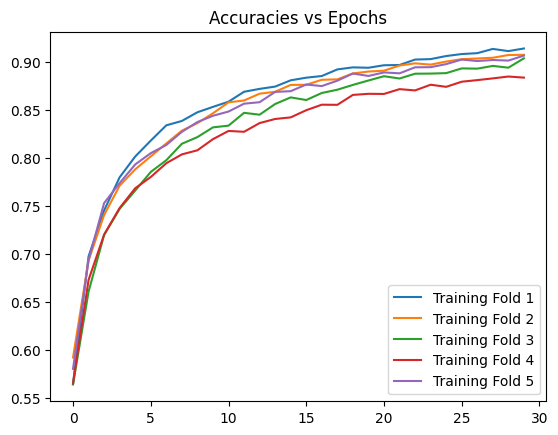

In [69]:
plt.title('Accuracies vs Epochs')
plt.plot(history_per_fold[0].history['accuracy'], label='Training Fold 1')
plt.plot(history_per_fold[1].history['accuracy'], label='Training Fold 2')
plt.plot(history_per_fold[2].history['accuracy'], label='Training Fold 3')           
plt.plot(history_per_fold[3].history['accuracy'], label='Training Fold 4')
plt.plot(history_per_fold[4].history['accuracy'], label='Training Fold 5')
plt.legend()
plt.show()

In [70]:
# == Provide average scores ==
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
#print('------------------------------------


Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.28855660557746887 - Accuracy: 0.8765484690666199%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.23079457879066467 - Accuracy: 0.9053823351860046%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.2530573904514313 - Accuracy: 0.8987612128257751%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.2805907428264618 - Accuracy: 0.8786843419075012%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.2525064945220947 - Accuracy: 0.8989747762680054%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.8916702270507812 (+- 0.011738493987953345)
> Loss: 0.26110116243362425


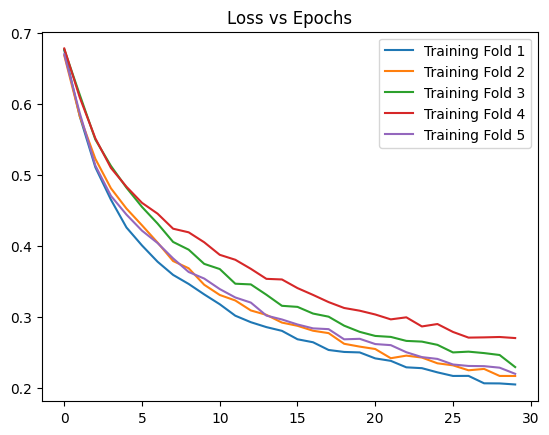

In [72]:
plt.title('Loss vs Epochs')
plt.plot(history_per_fold[0].history['loss'], label='Training Fold 1')
plt.plot(history_per_fold[1].history['loss'], label='Training Fold 2')
plt.plot(history_per_fold[2].history['loss'], label='Training Fold 3')           
plt.plot(history_per_fold[3].history['loss'], label='Training Fold 4')
plt.plot(history_per_fold[4].history['loss'], label='Training Fold 5')
plt.legend()
plt.show()